In [15]:
import geopandas as gpd
import pandas as pd
# Plotting the values
import matplotlib.pyplot as plt
plt.style.use("ggplot")
# Changes the size of the inline plot
plt.rcParams['figure.figsize'] = [15, 8]


# Load csv file
df = pd.read_csv("indo_eq/indo_eq.csv")

# Create geometry using longitude, latitude
geometry = gpd.points_from_xy(df.longitude,df.latitude)

# Create a geopandas dataframe using the geometry
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

geo_df.to_file("indo_eq/indo_eq.shp")

C:\Users\tranq\AppData\Local\Temp\ipykernel_12480\448737511.py:19: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  geo_df.to_file("indo_eq/indo_eq.shp")


In [2]:
### QGIS - HOW TO SET VALUES ###
# https://gis.stackexchange.com/questions/339419/qgis-3-4-6-symbology-using-both-size-and-colour-to-represent-two-pieces-of-i



In [16]:
# Importing a shape file
eqs = gpd.read_file("indo_eq/indo_eq.shp")

# Once you've imported the shape file, its called a geopandas dataframe
# geopandas.geodataframe.GeoDataFrame
type(eqs)

# Importantly, it contains a "geometry" column that tells what the name of the shape is and its 
# coordinates: for example:
# 0       POINT (98.62590 -0.62940)
# 1       POINT (100.10060 0.21900)
# 2      POINT (105.28870 -6.86000)
# 3      POINT (125.08080 -4.80650)
# 4      POINT (122.22740 -7.60330)
eqs.geometry

0       POINT (98.62590 -0.62940)
1       POINT (100.10060 0.21900)
2      POINT (105.28870 -6.86000)
3      POINT (125.08080 -4.80650)
4      POINT (122.22740 -7.60330)
                 ...             
85     POINT (123.80700 -0.64900)
86      POINT (124.52000 4.23200)
87     POINT (100.59400 -3.31900)
88    POINT (113.93100 -10.70800)
89     POINT (120.09600 -1.31500)
Name: geometry, Length: 90, dtype: geometry

<AxesSubplot:>

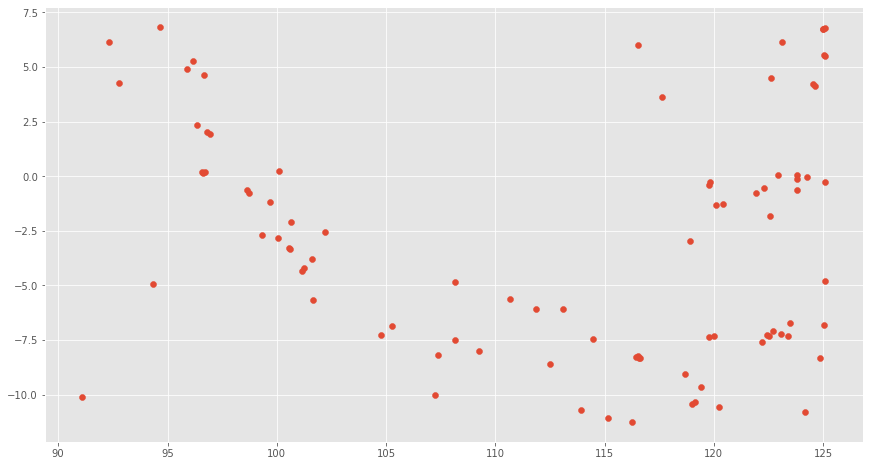

In [17]:
# Plotting the values

eqs.plot()

<AxesSubplot:>

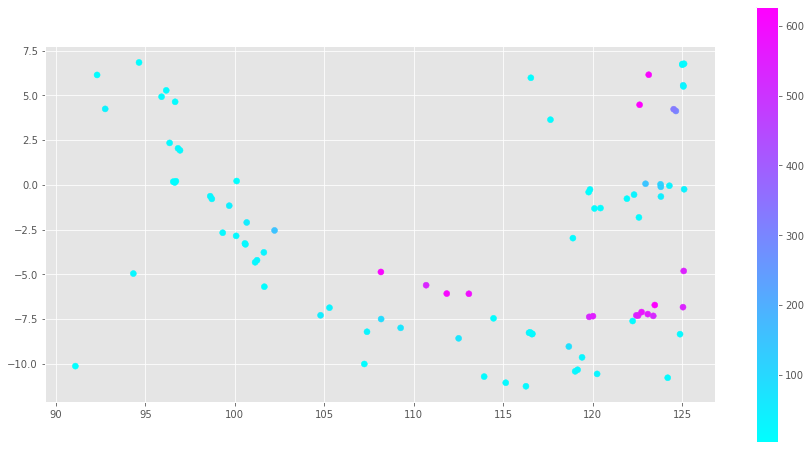

In [18]:
# You can graduate the colours using a specific column of the data


eqs.plot(cmap = 'cool', 
         column = 'depth', 
         legend = True)

<AxesSubplot:>

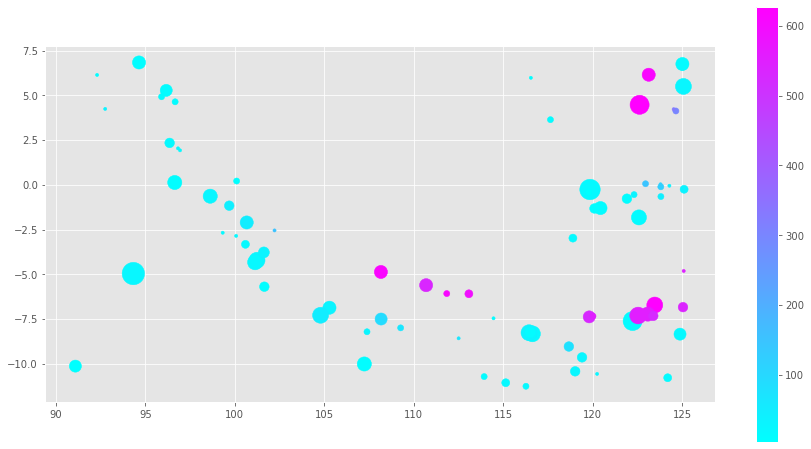

In [19]:
# You can also adjust the size using a column from the dataframe

# Scale the values of magnitude
eqs['scale_mag'] = eqs['mag'].apply(lambda x: round((500 - 10)*((x - 6) / (7.8 - 6)) + 10))

eqs.plot(cmap = 'cool', 
         column = 'depth', 
         markersize = eqs['scale_mag'], 
         legend = True)

<AxesSubplot:>

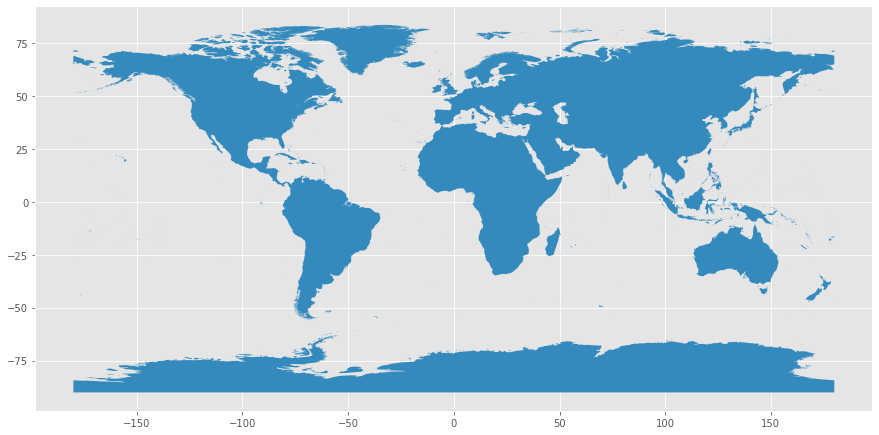

In [20]:
# Adding multiple plots
# First let's get some coastline data

# This is the coastline data of the entire world
coastline = gpd.read_file("ne_10m_land/ne_10m_land.shp")
coastline.plot()

<AxesSubplot:>

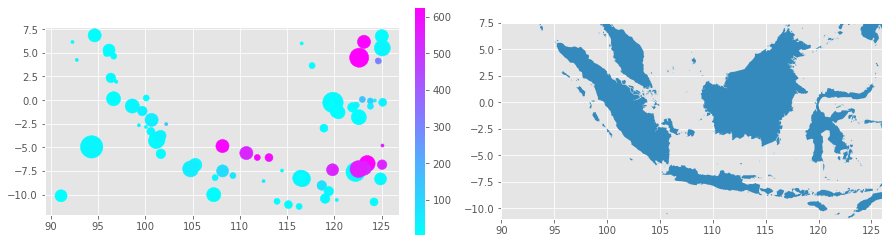

In [21]:
# Plot the two graphs side-by-side
# Recall: ax1 and ax2 are the two axes that are being plotted in the figure
fig, (ax1, ax2) = plt.subplots(ncols = 2)

#  We're not super interested in the WHOLE WORLD
# If we look at our area of interest again, we can see that its  only from -11 to 7.5 and 90 to 126
# Adjust the xlim and ylim to make it the same area
ax2.set_xlim(90, 126)
ax2.set_ylim(-11, 7.5)

eqs.plot(ax = ax1,
         cmap = 'cool', 
         column = 'depth', 
         markersize = eqs['scale_mag'], 
         legend = True, 
         # This adjust the size of the colorbar
         legend_kwds = {'fraction': 0.03, 'pad': 0.04})
coastline.plot(ax = ax2)

<AxesSubplot:>

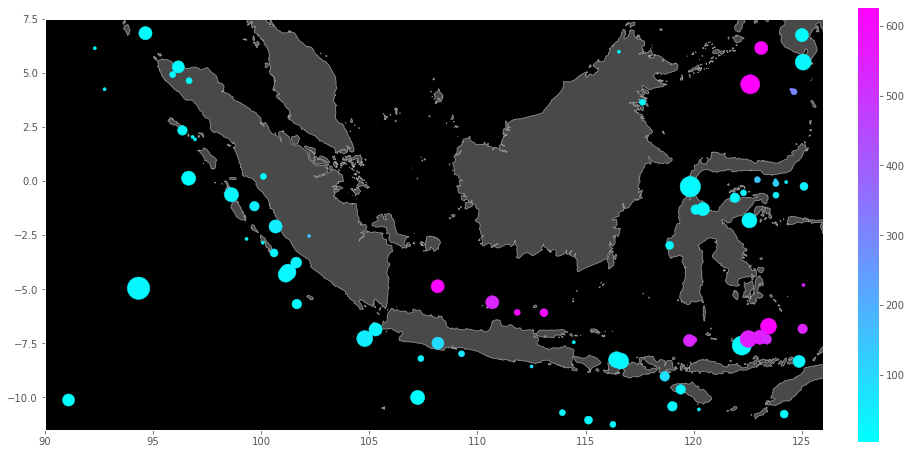

In [22]:
# That's nice, but we want to plot the earthquakes on TOP of the planet
# Relatively simple
base = coastline.plot(color = 'dimgrey',
                      edgecolor ='silver',
                      # This is the opacity of the layer
                      alpha = 0.7,
                      linewidth = 0.8)

# Remember to set the appropriate values again
base.set_xlim(90, 126)
base.set_ylim(-11.5, 7.5)
# We can make the background black for easier contrast
base.set_facecolor('black')
# Turn off the gridlines
base.grid(False)

# Note that we set the axis we're drawing on to be the base layer
eqs.plot(ax = base,
         cmap = 'cool', 
         column = 'depth', 
         markersize = eqs['scale_mag'], 
         legend = True, 
         # This adjust the size of the colorbar
         legend_kwds = {'fraction': 0.03, 'pad': 0.04})

In [23]:
# All of these maps can be correctly plotted because they use the WGS84, a very standard
# coordinate reference system. We can confirm this as follows

# crs = coordinate reference system
# nb: epsg:4326 -> WGS84
print(eqs.crs)
print(coastline.crs)

# Since eqs doesn't have a reference system, we'll need to set one
eqs = eqs.set_crs('epsg:4326')
print(eqs.crs)

None
epsg:4326
epsg:4326


In [24]:
# This is well and good for plotting spatial data, but sometimes we need to get out of spatial 
# data and into more conventional units, such as meters. We need 'reproject' our data

# EPSG:23830 is good for indonesia, so we'll use that
# You'll notice the units are in meters - good!
# You can find many of these on https://epsg.io/23830


# If you get an error, update pyproj using conda-forge
projected_coastline = coastline.to_crs(epsg = 23830)
projected_eqs = eqs.to_crs(epsg = 23830)

<AxesSubplot:>

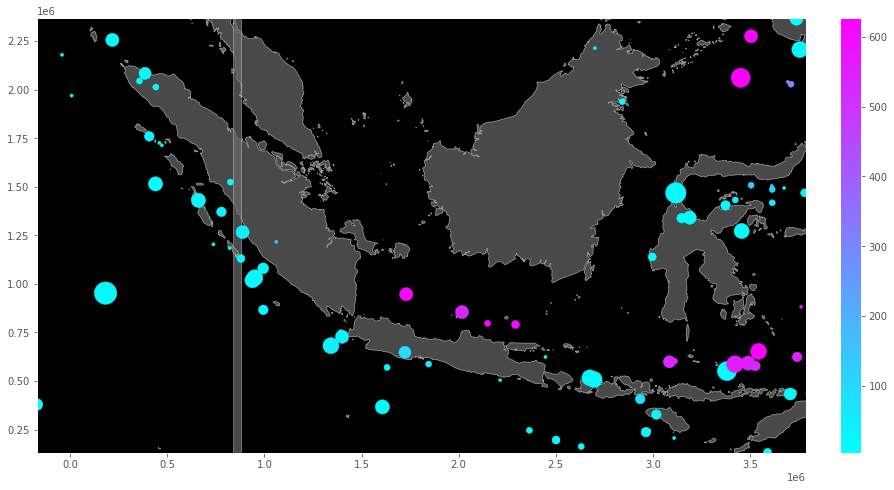

In [25]:
# Let's plot with the new system now
# Relatively simple
base = projected_coastline.plot(color = 'dimgrey',
                      edgecolor ='silver',
                      # This is the opacity of the layer
                      alpha = 0.7,
                      linewidth = 0.8)

# Remember to set the appropriate values again, since they're different with a 
# different coordinate system
# You can find the min and max x/y using the .bounds attribute on the geometry column in the
# geopandas dataframe
base.set_xlim(-174000, 3790000)
base.set_ylim(130000, 2370000)
# We can make the background black for easier contrast
base.set_facecolor('black')
# Turn off the gridlines
base.grid(False)

# Note that we set the axis we're drawing on to be the base layer
projected_eqs.plot(ax = base,
         cmap = 'cool', 
         column = 'depth', 
         markersize = eqs['scale_mag'], 
         legend = True, 
         # This adjust the size of the colorbar
         legend_kwds = {'fraction': 0.03, 'pad': 0.04})